In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore' )


#### 변수 설명
###### 1. Attrition_Flag : 계정이 폐쇄된 경우, 아닌경우
###### 2. Customer_Age : 고객 나이
###### 3. Gender : 성별
###### 4. Dependent_count : 부양가족 수
###### 5. Education_Level : 교육 수준 (고등학교, 대졸 등)
###### 6. Marital_Status : 결혼 상태(기혼,미혼,이혼,불명)
###### 7. Income_Category : 소득 범주 (범위)
###### 8. Card_Category : 카드 유형(블루, 실버, 골드, 플래티넘)
###### 9. Months_on_book : 은행과의 관계기간(월기준?)
###### 10. Total_Relationship_Count : 고객이 보유한 제품의 총수
###### 11. Months_Inactive_12_mon : 지난 12개월 동안 비활성 개월 수
###### 12. Contacts_Count_12_mon : 지난 12개월 동안의 연락처 수
###### 13. Credit_Limit : 신용카드 한도
###### 14. Total_Revolving_Bal : 신용카드의 총 회전잔액
###### 15. Avg_Open_To_Buy : 신용 한도 구매 가능(최근 12개월 평균)
###### 16. Total_Amt_Chng_Q4_Q1 : 거래 금액 변경(Q1 대비 Q4)
###### 17. Total_Trans_Amt : 총 거래 금액(지난 12개월)
###### 18. Total_Trans_Ct : 총 거래 건수(지난 12개월)
###### 19. Total_Ct_Chng_Q4_Q1: 거래 수의 변화(Q1 대비 Q4)
###### 20. Avg_Utilization_Ratio : 평균 카드 이용률

#### 범주형 변수
###### 1. Attrition_Flag : 계정이 폐쇄된 경우, 아닌경우
###### 3. Gender : 성별
###### 5. Education_Level : 교육 수준 (고등학교, 대졸 등)
###### 6. Marital_Status : 결혼 상태(기혼,미혼,이혼,불명)
###### 7. Income_Category : 소득 범주 (범위)
###### 8. Card_Category : 카드 유형(블루, 실버, 골드, 플래티넘)

In [15]:
data = pd.read_csv('./datasets/BankChurners.csv')
data = data.iloc[:,1:21]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
for list in data.columns:
    print(f'column name : {list}\n column_category : {np.unique(data[list])}\n')

column name : Attrition_Flag
 column_category : ['Attrited Customer' 'Existing Customer']

column name : Customer_Age
 column_category : [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 73]

column name : Gender
 column_category : ['F' 'M']

column name : Dependent_count
 column_category : [0 1 2 3 4 5]

column name : Education_Level
 column_category : ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']

column name : Marital_Status
 column_category : ['Divorced' 'Married' 'Single' 'Unknown']

column name : Income_Category
 column_category : ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']

column name : Card_Category
 column_category : ['Blue' 'Gold' 'Platinum' 'Silver']

column name : Months_on_book
 column_category : [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 5

In [16]:
len(data.columns)

20

In [ ]:
list = ['Attrition_Flag', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
sns.pairplot(data[list], hue='Attrition_Flag')

In [ ]:
data = pd.read_csv('./datasets/BankChurners.csv')
data = data.iloc[:,1:21]
lists = data.columns
num_list = ["Attrition_Flag"]
a = []
for list in lists:
    if (data[list].dtypes != 'O'):
        num_list.append(list)
 
sns.pairplot(data[num_list], hue='Attrition_Flag')

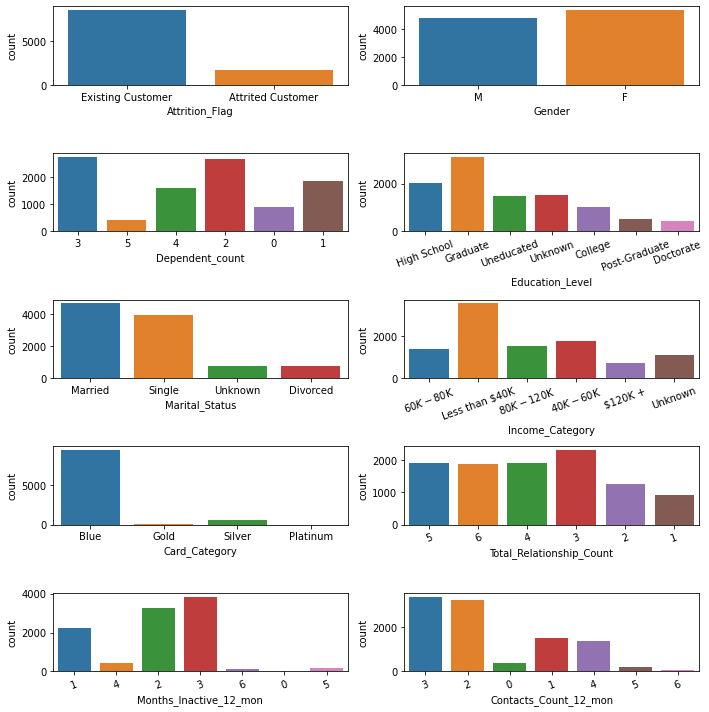

In [78]:
data = pd.read_csv('./datasets/BankChurners.csv')
lists = data.columns
object_list = []
a = []
for list in lists:
    if (data[list].dtypes == 'O'):
        object_list.append(list)

    elif (len(np.unique(data[list])) < 10):
        data[list] = data[list].astype(str)
        object_list.append(list)

nrow = int(input(f'{len(object_list)} nrow'))
ncol = int(input('ncol'))

plt.figure(figsize=(10,10))

for list,i in zip(object_list, np.arange(len(object_list))+1):
    plt.subplot(nrow, ncol, i)
    sns.countplot(data[list])


    if (len(np.unique(data[list])) > 4):
        for i in range(len(np.unique(data[list]))):
            a.append(len(np.unique(data[list])[i]))
            if (np.max(a) > 5):
                plt.xticks(rotation=20)
    plt.ylabel("count")
    plt.xlabel(list)

plt.tight_layout()    
plt.show()


In [15]:
lists = data.columns
object_list = []
for list in lists:
    if (data[list].dtypes == 'O' or len(np.unique(data[list])) < 10):
        object_list.append(list)
print(object_list)

['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']


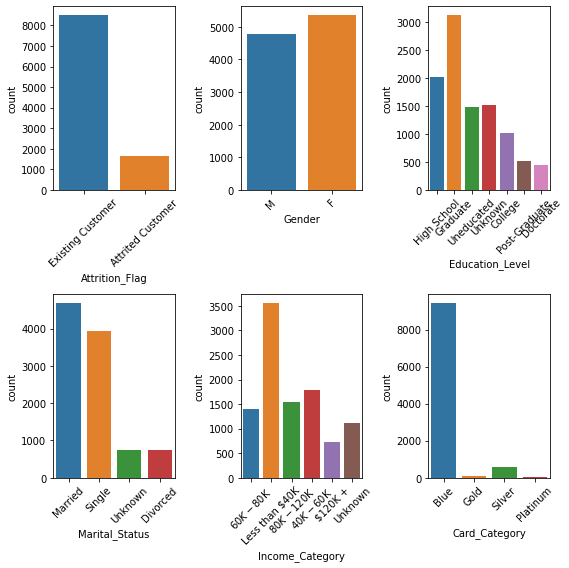

In [32]:
def object_countplot(data, nrow, ncol):
    lists = data.columns
    object_list = []
    
    for list in lists:
        if (data[list].dtypes == 'O'):
            object_list.append(list)

    plt.figure(figsize=(8,8))

    for list,i in zip(object_list, np.arange(len(object_list))):
        plt.subplot(nrow, ncol, i+1)
        sns.countplot(data[list])
        plt.xticks(rotation=45)
        plt.ylabel("count")
        plt.xlabel(list)
    plt.tight_layout()
    plt.show()

object_countplot(data, 2, 3)

In [25]:
cor = data.corr()
cor

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


<AxesSubplot:>

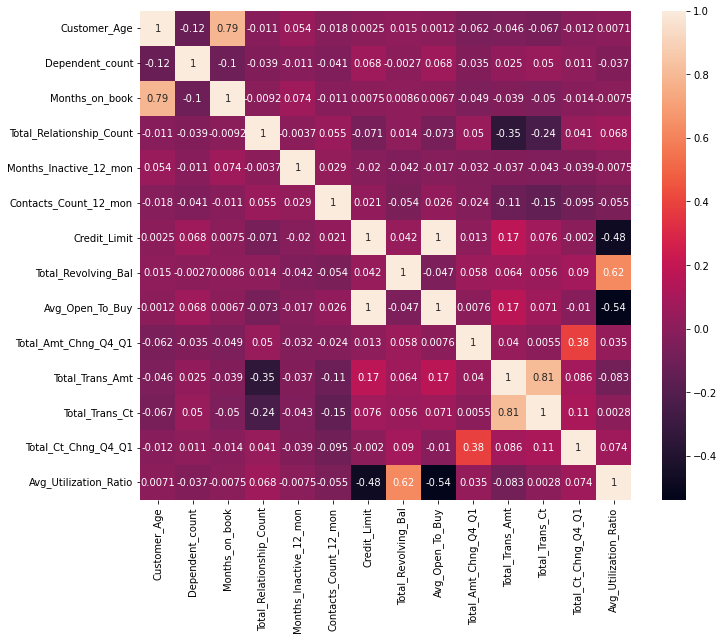

In [30]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor, annot=True)


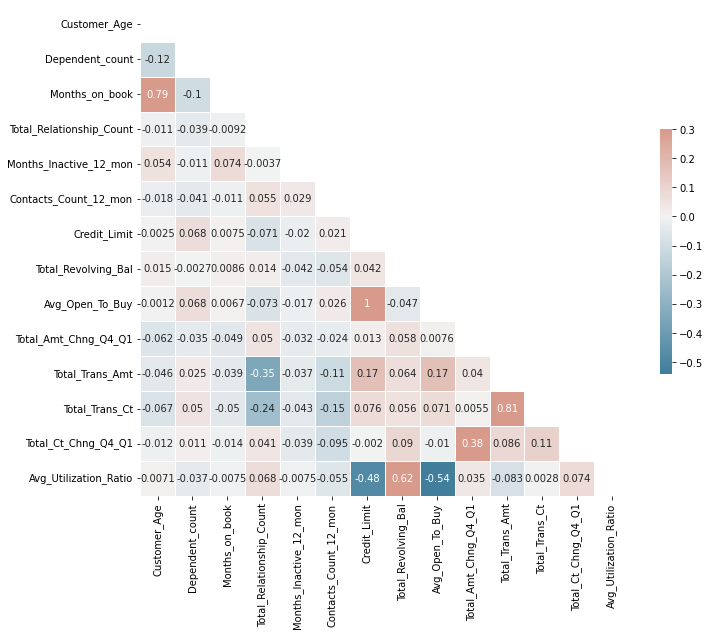

In [31]:
# Generate a mask for the upper triangle
# 출처 : https://velog.io/@sasganamabeer/Data-Science-EDA-%EC%95%BC-%EB%84%88%EB%91%90-EDA-%ED%95%A0-%EC%88%98-%EC%9E%88%EC%96%B4-2-%EC%8B%9C%EA%B0%81%ED%99%94-%EC%BD%94%EB%93%9C-%EC%9E%91%EC%84%B1%ED%95%98%EA%B8%B0-by-Python

mask = np.triu(np.ones_like(cor))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=0)
plt.show()